Aim : To identify if the credit card holder is going to commit a default in the coming month or not. It is a Classification problem that comes under Supervised Machine Learning Algorithm:

- Features available :

Target Feature:

Y (default payment next month): Default 1 - yes, 0 - no

Independent Features:

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)

X4: Marital status (1 = married; 2 = single; 3 = others)

X5: Age (year)

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005;

X7 = the repayment status in August, 2005; . .

X11 = the repayment status in April, 2005.The measurement scale for the repayment status is: -1 = pay duly; 
1 = payment delay for one month; 2 = payment delay for two months; . . .; 
8 = payment delay for eight months; 9 = payment delay for nine months and above.

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 


In [2]:
#Importing librraies for computation:
import numpy as np # For mathematical calculations
import pandas as pd #For handling dataframe
import seaborn as sns #For plotting graphs
import matplotlib.pyplot as plt #For plotting graphs
from sklearn.preprocessing import StandardScaler #For scaling the parameters
from sklearn.model_selection import train_test_split #For splitting the data into test and train set
from sklearn.ensemble import RandomForestClassifier # For building a random forest model
from sklearn.metrics import accuracy_score #For printing the accuracy score of model
from sklearn.metrics import confusion_matrix #For building a confusion matrix to calculate sensitivity and specifivity
from mlxtend.plotting import plot_confusion_matrix #For building a confusion matrix plot
import xgboost as xgb #For building a XG boost model

 1. Data cleaning & Formatting:

In [3]:
#Importing the dataset & skipping the first row:
df = pd.read_csv("C:/Users/abhip/OneDrive/Desktop/BI Mini Project.csv", skiprows = 1)

In [4]:
#Display top of dataframe:
df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [5]:
#Checking names of all the columns:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [6]:
#Checking the shape of our dataset:
df.shape

(30000, 25)

In [7]:
#Checking for columns datatypes and non-missing values:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

- We can see that we have 30,000 rows and 25 columns
- In the data info section we can see that we have all 30,000 values in the dataset thus we do not have any null values available
- All the data columns are of integer types and thus can be utilized during model implementation

In [8]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [9]:
missing_values_table(df)

Your selected dataframe has 25 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [10]:
#Checking data statistics of every column:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# 2 . Eploratory Data Analysis:

The data does not has any missing values and thus we are ready for an Exploratory Data Analysis where we will conduct univariate and bivariate analysis to detect any kind of trend anamoly, pattern or relatonships in the variables present. 

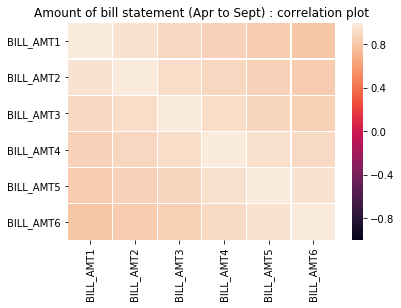

In [11]:
#Checking Feature correlation for Bill Amt:
var = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
plt.title('Amount of bill statement (Apr to Sept) : correlation plot')
corr = df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

#We can see in the above plot that the correlation between months is decreasing as the months are increasing with the most between April and Septemebr

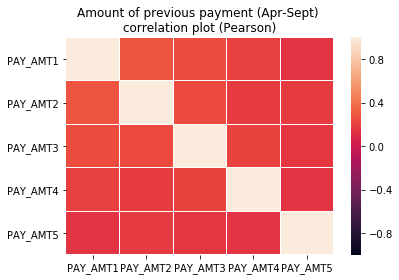

In [12]:
var = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5']
plt.title('Amount of previous payment (Apr-Sept) \ncorrelation plot (Pearson)')
corr = df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

#We do not see much of a correlation between the payment amounts

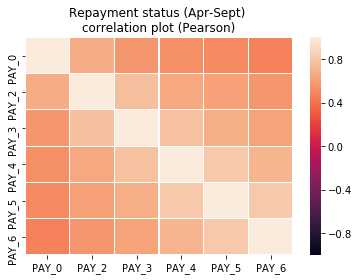

In [13]:
var = ['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
plt.title('Repayment status (Apr-Sept) \ncorrelation plot (Pearson)')
corr = df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

#Correlation is decreasing as the months are increasing


In order to quantify the correlations between the features (variables) and the target, we can calculate the "Pearson correlation coefficient". This is a measure of the strength and direction of a linear relationship between two variables. A value of -1 means the two variables are perfectly negatively lineraly related and a value of +1 means the two variables are perfectly positivly lineraly correlated. Altough there can be non-linear relationships between the features and targets and correlation coefficients do not account for interactions between features, linear relationships are still a good way to see a trend in the data. We can use these values to select features in our model.

We do not see any prominent strong correlations. The variable most negatively correlated with our target variable is LIMIT_BAL and most positively related is PAY_0.

In [14]:
#Correlations between independent variables and target variable:
# - Finding correlations and sorting them:
corr_data = df.corr()['default payment next month'].sort_values()
#Print the correlations:
print(corr_data, '\n')

LIMIT_BAL                    -0.153520
PAY_AMT1                     -0.072929
PAY_AMT2                     -0.058579
PAY_AMT4                     -0.056827
PAY_AMT3                     -0.056250
PAY_AMT5                     -0.055124
PAY_AMT6                     -0.053183
SEX                          -0.039961
MARRIAGE                     -0.024339
BILL_AMT1                    -0.019644
BILL_AMT2                    -0.014193
BILL_AMT3                    -0.014076
ID                           -0.013952
BILL_AMT4                    -0.010156
BILL_AMT5                    -0.006760
BILL_AMT6                    -0.005372
AGE                           0.013890
EDUCATION                     0.028006
PAY_6                         0.186866
PAY_5                         0.204149
PAY_4                         0.216614
PAY_3                         0.235253
PAY_2                         0.263551
PAY_0                         0.324794
default payment next month    1.000000
Name: default payment nex

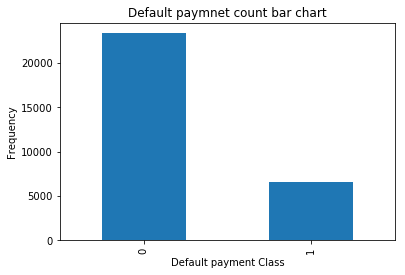

In [15]:
#Single Variable Plots:
count_default_payments = pd.value_counts(df['default payment next month'], sort = True). sort_index()
count_default_payments.plot(kind = 'bar')
plt.title("Default paymnet count bar chart")
plt.xlabel("Default payment Class")
plt.ylabel("Frequency")
plt.show()

- From the above chart we can see that > 6000 clients (~ 20 %) out of the total 30,000 clients will default out and won't pay in the coming months

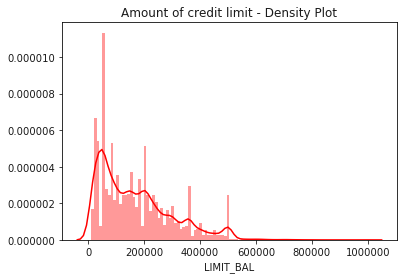

In [16]:
# Exploring LIMT_BAL column:
plt.title('Amount of credit limit - Density Plot')
sns.set_color_codes("dark")
sns.distplot(df['LIMIT_BAL'],kde=True,bins=100, color="red")
plt.show()

Largest group of credit limit appears to be ~ 50,000 which can be verified below:

In [17]:
df['LIMIT_BAL'].value_counts().shape

(81,)

In [18]:
#Shows that Limit Balanace has 81 distinct values
df['LIMIT_BAL'].value_counts().head(5)

50000     3365
20000     1976
30000     1610
80000     1567
200000    1528
Name: LIMIT_BAL, dtype: int64

#We can see that maximum number of people lie in the 50 k credit limit range:

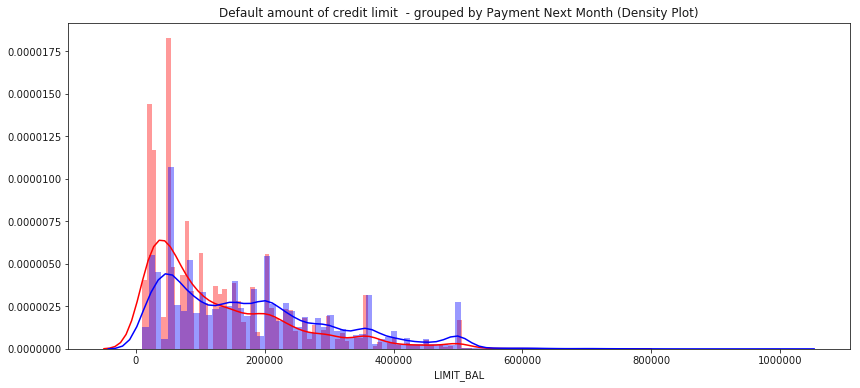

In [19]:
class_0 = df.loc[df['default payment next month'] == 0]["LIMIT_BAL"]
class_1 = df.loc[df['default payment next month'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (14,6))
plt.title('Default amount of credit limit  - grouped by Payment Next Month (Density Plot)')
sns.set_color_codes("pastel")
sns.distplot(class_1,kde=True,bins=100, color="red")
sns.distplot(class_0,kde=True,bins=100, color="blue")
plt.show()

#The default rate identified by red line is the most for credit limits 0 - 1,00,0000 and this groups density of defaulter is larger here than the normal.The number of defaulters decrease as the credit limit increases. 


- Let us explore the distribution of or categorical variables:

In [20]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [21]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [22]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

- Let us use histograms to see the trend in numerical variables:

In [23]:
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()
    plt.show()

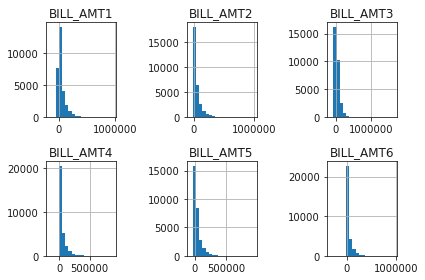

In [24]:
bills = df[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
draw_histograms(bills, bills.columns, 2, 3, 20)

pay = df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
draw_histograms(pay, pay.columns, 2, 3, 20)

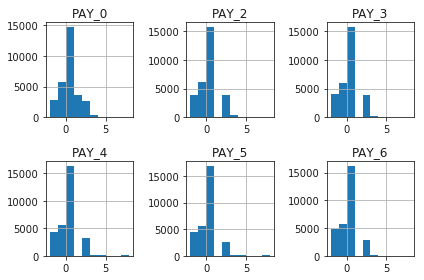

In [25]:
late = df[['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

- From above data exploration we can see that some of the data points are missclassified and need to be treated.
. The "0" is marriage can be classified as "3" or Other.
. The "0" (undocumented), "5" and "6" (label unknown) in EDUCATION can also be put in a 'Other' cathegory (thus 4)

From above data exploration we can see that some of the data points are missclassified and need to be treated. 
.The "0" is marriage can be classified as "3" or Other which can be divorced etx
.The "0" (undocumented), "5" and "6" (label unknown) in EDUCATION can also be put in a 'Other' cathegory which maye be less than high school education

In [26]:
fill = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fill, 'EDUCATION'] = 4
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [27]:
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

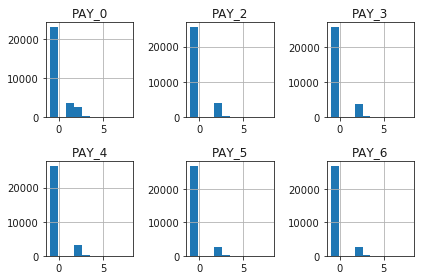

In [28]:
#Cleaning the pay columns. We have seen in the docment that pay duly is denoted by "-1" then "-2" and "0" should 
#not have any significance. Let us transform them in all pay columns:
fill = (df.PAY_0 == -2)  | (df.PAY_0 == 0)
df.loc[fill, 'PAY_0'] = -1
fill = (df.PAY_2 == -2) | (df.PAY_2 == 0)
df.loc[fill, 'PAY_2'] = -1
fill = (df.PAY_3 == -2) | (df.PAY_3 == 0)
df.loc[fill, 'PAY_3'] = -1
fill = (df.PAY_4 == -2) | (df.PAY_4 == 0)
df.loc[fill, 'PAY_4'] = -1
fill = (df.PAY_5 == -2) | (df.PAY_5 == 0)
df.loc[fill, 'PAY_5'] = -1
fill = (df.PAY_6 == -2) | (df.PAY_6 == 0)
df.loc[fill, 'PAY_6'] = -1
late = df[['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

- Most of the cleaning has been done. Let us try and do a correlation analysis to see how independent and target variables are correlated to each other.

In [29]:
def corr_2_vars(Var1, Var2):
    res = df.groupby([Var1, Var2]).size().unstack()
    res['perc'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
    return res

In [30]:
# Let us compare education and target variable:
corr_2_vars('EDUCATION', 'default payment next month')

default payment next month,0,1,perc
EDUCATION,,,
1,8549,2036,0.192348
2,10700,3330,0.237349
3,3680,1237,0.251576
4,435,33,0.070513


 - We can see above that the probability of being a defaulter decreases as the education level increases with the only exception as Category 4 but it won't have a lot of relevance in the final output because of low number of values

In [31]:
# Let us compare SEX and target variable:
corr_2_vars('SEX', 'default payment next month')

default payment next month,0,1,perc
SEX,,,
1,9015,2873,0.241672
2,14349,3763,0.207763


 - We can see that about 22% of people will be defaulters in the next month with more men than women but the difference is not that much with respect to SEX

In [32]:
# Let us compare MARRIAGE and target variable:
corr_2_vars('MARRIAGE', 'default payment next month')

default payment next month,0,1,perc
MARRIAGE,,,
1,10453,3206,0.234717
2,12623,3341,0.209283
3,288,89,0.236074


 - We can see that married are more prone to be defaulters probbaly becasue of them having more responsibility '(taking acre of children and marital related expenses). The other or categry 3 won't matter much becasue of it being less in number.

# Feature Engineering

In [33]:
# We saw that men and married people are most likely to default. So let us try and combine these categories and see if we have a better feature:
df['SE_MA_2'] = 0
df.loc[((df.SEX == 1) & (df.MARRIAGE == 1)) , 'SE_MA_2'] = 1 #married man
df.loc[((df.SEX == 1) & (df.MARRIAGE == 2)) , 'SE_MA_2'] = 2 #single man
df.loc[((df.SEX == 1) & (df.MARRIAGE == 3)) , 'SE_MA_2'] = 3 #divorced man
df.loc[((df.SEX == 2) & (df.MARRIAGE == 1)) , 'SE_MA_2'] = 4 #married woman
df.loc[((df.SEX == 2) & (df.MARRIAGE == 2)) , 'SE_MA_2'] = 5 #single woman
df.loc[((df.SEX == 2) & (df.MARRIAGE == 3)) , 'SE_MA_2'] = 6 #divorced woman
corr_2_vars('SE_MA_2', 'default payment next month')

default payment next month,0,1,perc
SE_MA_2,,,
1,3844,1346,0.259345
2,5068,1485,0.226614
3,103,42,0.289655
4,6609,1860,0.219625
5,7555,1856,0.197216
6,185,47,0.202586


We can see clearly that married men have a higher probability of defaulting, single men have nothing special with respect to the all population and single women have a lowe probability of defaulting. Among the divorced, men have more troubles (but these categories are not very much populated).

In [34]:
# We can probbaly use age bins instead of age and see how it is related with target variable:
df['AgeBin'] = pd.cut(df['AGE'], 6, labels = [1,2,3,4,5,6])
#because 1 2 3 ecc are "categories" so far and we need numbers
df['AgeBin'] = pd.to_numeric(df['AgeBin'])
df.loc[(df['AgeBin'] == 6) , 'AgeBin'] = 5 #We merged 6th bin with 5th bin as there were very less categries in bin 6th
df.AgeBin.value_counts() 

1    11013
2    10713
3     6005
4     1930
5      339
Name: AgeBin, dtype: int64

In [35]:
# Finding correlation between Agebins ccorr_2_cols('AgeBin', 'SEX')reated and target variable:
corr_2_vars('AgeBin', 'default payment next month')

default payment next month,0,1,perc
AgeBin,,,
1,8542,2471,0.224371
2,8524,2189,0.204331
3,4606,1399,0.232973
4,1449,481,0.249223
5,243,96,0.283186


In [36]:
corr_2_vars('AgeBin', 'SEX')

SEX,1,2,perc
AgeBin,,,
1,3842,7171,0.651140
2,4363,6350,0.592738
3,2587,3418,0.569192
4,917,1013,0.524870
5,179,160,0.471976


We can see that default probability goes down in their 30's and then goes higher and higher. At the same time, the percentage of men is growing with the age category. Thus let us combine the two as before and create a combination of the two.

In [37]:
df['SE_AG'] = 0
df.loc[((df.SEX == 1) & (df.AgeBin == 1)) , 'SE_AG'] = 1 #man in 20's
df.loc[((df.SEX == 1) & (df.AgeBin == 2)) , 'SE_AG'] = 2 #man in 30's
df.loc[((df.SEX == 1) & (df.AgeBin == 3)) , 'SE_AG'] = 3 #man in 40's
df.loc[((df.SEX == 1) & (df.AgeBin == 4)) , 'SE_AG'] = 4 #man in 50's
df.loc[((df.SEX == 1) & (df.AgeBin == 5)) , 'SE_AG'] = 5 #man in 60's and above
df.loc[((df.SEX == 2) & (df.AgeBin == 1)) , 'SE_AG'] = 6 #woman in 20's
df.loc[((df.SEX == 2) & (df.AgeBin == 2)) , 'SE_AG'] = 7 #woman in 30's
df.loc[((df.SEX == 2) & (df.AgeBin == 3)) , 'SE_AG'] = 8 #woman in 40's
df.loc[((df.SEX == 2) & (df.AgeBin == 4)) , 'SE_AG'] = 9 #woman in 50's
df.loc[((df.SEX == 2) & (df.AgeBin == 5)) , 'SE_AG'] = 10 #woman in 60's and above
corr_2_vars('SE_AG', 'default payment next month')

default payment next month,0,1,perc
SE_AG,,,
1,2929,913,0.237637
2,3350,1013,0.232180
3,1939,648,0.250483
4,666,251,0.273719
5,131,48,0.268156
6,5613,1558,0.217264
7,5174,1176,0.185197
8,2667,751,0.219719
9,783,230,0.227048


In [38]:
#Let us examine how careless our client is by analyzing the expenses of a client:
df['Avg_exp_5'] = ((df['BILL_AMT5'] - (df['BILL_AMT6'] - df['PAY_AMT5']))) / df['LIMIT_BAL']
df['Avg_exp_4'] = (((df['BILL_AMT5'] - (df['BILL_AMT6'] - df['PAY_AMT5'])) +
                 (df['BILL_AMT4'] - (df['BILL_AMT5'] - df['PAY_AMT4']))) / 2) / df['LIMIT_BAL']
df['Avg_exp_3'] = (((df['BILL_AMT5'] - (df['BILL_AMT6'] - df['PAY_AMT5'])) +
                 (df['BILL_AMT4'] - (df['BILL_AMT5'] - df['PAY_AMT4'])) +
                 (df['BILL_AMT3'] - (df['BILL_AMT4'] - df['PAY_AMT3']))) / 3) / df['LIMIT_BAL']
df['Avg_exp_2'] = (((df['BILL_AMT5'] - (df['BILL_AMT6'] - df['PAY_AMT5'])) +
                 (df['BILL_AMT4'] - (df['BILL_AMT5'] - df['PAY_AMT4'])) +
                 (df['BILL_AMT3'] - (df['BILL_AMT4'] - df['PAY_AMT3'])) +
                 (df['BILL_AMT2'] - (df['BILL_AMT3'] - df['PAY_AMT2']))) / 4) / df['LIMIT_BAL']
df['Avg_exp_1'] = (((df['BILL_AMT5'] - (df['BILL_AMT6'] - df['PAY_AMT5'])) +
                 (df['BILL_AMT4'] - (df['BILL_AMT5'] - df['PAY_AMT4'])) +
                 (df['BILL_AMT3'] - (df['BILL_AMT4'] - df['PAY_AMT3'])) +
                 (df['BILL_AMT2'] - (df['BILL_AMT3'] - df['PAY_AMT2'])) +
                 (df['BILL_AMT1'] - (df['BILL_AMT2'] - df['PAY_AMT1']))) / 5) / df['LIMIT_BAL']
df[['LIMIT_BAL', 'Avg_exp_5', 'BILL_AMT5', 'Avg_exp_4', 'BILL_AMT4','Avg_exp_3', 'BILL_AMT3',
    'Avg_exp_2', 'BILL_AMT2', 'Avg_exp_1', 'BILL_AMT1', 'default payment next month']].sample(10)

,LIMIT_BAL,Avg_exp_5,BILL_AMT5,Avg_exp_4,BILL_AMT4,Avg_exp_3,BILL_AMT3,Avg_exp_2,BILL_AMT2,Avg_exp_1,BILL_AMT1,default payment next month
21908,200000,0.002700,540,0.002325,390,0.002200,390,0.002138,390,0.002836,1126,0
15638,250000,0.048044,36022,0.027184,1581,0.027475,7014,0.021987,1381,0.018694,1381,1
13725,300000,0.015043,287816,0.023470,286885,0.035996,295173,0.039463,299066,0.036530,293498,0
16540,30000,0.018267,24309,0.020583,24996,0.021300,22981,0.018792,21637,0.019347,22284,0
29433,240000,0.016262,188520,0.017190,187756,0.019703,186885,0.019232,182916,0.019768,181569,0
10864,60000,0.018833,28600,0.032300,29846,0.176444,55730,0.167875,61260,0.143747,61094,0
24269,20000,0.000000,11198,0.000000,10474,0.076967,14092,0.060450,13056,0.132780,19498,1
3953,110000,0.015691,79727,0.024709,80437,0.128961,107558,0.112084,110818,0.123900,79646,0
27471,360000,0.026567,9564,0.021614,10527,0.014409,-229,0.188862,256171,0.157581,221855,0
9098,130000,0.006985,46093,0.006846,45365,0.007208,44396,0.007363,43914,0.007400,41795,1


In [39]:
#Let us create a closeness variable to see by weighing the difference between Limit balance and Bill amt:
df['Closeness_6'] = (df.LIMIT_BAL - df.BILL_AMT6) / df.LIMIT_BAL
df['Closeness_5'] = (df.LIMIT_BAL - df.BILL_AMT5) / df.LIMIT_BAL
df['Closeness_4'] = (df.LIMIT_BAL - df.BILL_AMT4) / df.LIMIT_BAL
df['Closeness_3'] = (df.LIMIT_BAL - df.BILL_AMT3) / df.LIMIT_BAL
df['Closeness_2'] = (df.LIMIT_BAL - df.BILL_AMT2) / df.LIMIT_BAL
df['Closeness_1'] = (df.LIMIT_BAL - df.BILL_AMT1) / df.LIMIT_BAL
df[['Closeness_6', 'Closeness_5', 'Closeness_4', 'Closeness_3', 'Closeness_2',
   'Closeness_1', 'default payment next month']].sample(5)

,Closeness_6,Closeness_5,Closeness_4,Closeness_3,Closeness_2,Closeness_1,default payment next month
11751,1.000000,1.000000,1.000000,1.000000,0.995008,0.960077,1
4254,0.491500,0.492250,0.498167,0.462683,0.447550,0.336150,0
20452,0.565200,0.431035,0.089976,0.103359,0.098100,0.032894,1
2012,-0.061800,-0.093550,0.045850,0.049600,0.115200,0.086100,1
7356,0.244694,0.259613,0.274835,0.288965,0.236574,0.161697,1


In [40]:
# We can also create a utilization variable by dividing bill amount by credit limit:
#Let us examine how careless our client is by analyzing the expenses of a client:
df['util_6'] = (df.BILL_AMT6) / df.LIMIT_BAL
df['util_5'] = (df.BILL_AMT5) / df.LIMIT_BAL
df['util_4'] = (df.BILL_AMT4) / df.LIMIT_BAL
df['util_3'] = (df.BILL_AMT3) / df.LIMIT_BAL
df['util_2'] = (df.BILL_AMT2) / df.LIMIT_BAL
df['util_1'] = (df.BILL_AMT1) / df.LIMIT_BAL
df[['util_6', 'util_5', 'util_4', 'util_3', 'util_2',
   'util_1', 'default payment next month']].sample(5)

,util_6,util_5,util_4,util_3,util_2,util_1,default payment next month
24726,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
13392,0.194000,0.197360,0.204060,0.407520,0.451760,0.475880,0
11125,0.287732,0.296688,0.301256,0.294044,0.288248,0.282088,0
28661,0.199300,0.202940,0.990540,1.002020,1.023880,1.046160,0
26949,0.570547,0.564035,0.647250,0.619460,-0.021192,0.009798,0


Predictive Models:

In [41]:
#Let us define predictor features and target features:
target = 'default payment next month'
predictors = ['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'PAY_0','PAY_2', 'PAY_3', 
            'PAY_4', 'PAY_5', 'PAY_6','BILL_AMT1', 'BILL_AMT2',
            'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
            'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 
            'SE_MA_2', 'AgeBin', 'SE_AG', 'Avg_exp_5', 'Avg_exp_4',
            'Avg_exp_3', 'Avg_exp_2', 'Avg_exp_1', 'Closeness_5',
            'Closeness_4', 'Closeness_3', 'Closeness_2','Closeness_1', 
              'util_6', 'util_5', 'util_4', 'util_3', 'util_2','util_1']

In [46]:
train_df, test_df = train_test_split(df, test_size= 0.20, random_state= 42, shuffle=True )

In [47]:
#We should also keep a copy of traiing set and test set:
train_df_bkp = train_df.copy()
test_df_bkp = test_df.copy()

In [48]:
#Building a Random Forest Classifier:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
            oob_score=False, random_state=2018, verbose=False,
            warm_start=False)

In [49]:
# Let us now predict the target values:
clf.fit(train_df[predictors], train_df[target].values)
preds = clf.predict(test_df[predictors])

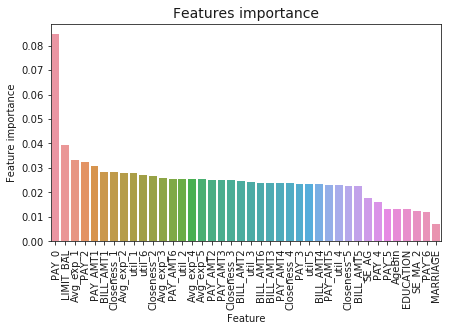

In [50]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

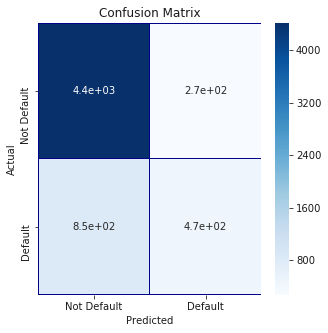

In [56]:
cm = pd.crosstab(test_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix')
plt.show()

In [52]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_df[target].values, preds)

0.64892726409730461

- The AUC score for Rnadom Forest came out to be ~ 67%

In [57]:
#Building a XG-Boost Classifier:

# Prepare the train and valid datasets

dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
dvalid = xgb.DMatrix(test_df[predictors], test_df[target].values)

#What to monitor (in this case, **train** and **test**)
watchlist = [(dtrain, 'train_df'), (dvalid, 'test_df')]

# Set xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = 42

In [61]:
#Train the model:

model = xgb.train(params, 
                dtrain, 
                100, 
                watchlist, 
                maximize=True)

[0]	train_df-auc:0.694746	test_df-auc:0.68705
[1]	train_df-auc:0.694767	test_df-auc:0.687112
[2]	train_df-auc:0.694767	test_df-auc:0.687112
[3]	train_df-auc:0.694834	test_df-auc:0.68733
[4]	train_df-auc:0.695516	test_df-auc:0.687979
[5]	train_df-auc:0.695516	test_df-auc:0.687979
[6]	train_df-auc:0.709543	test_df-auc:0.70588
[7]	train_df-auc:0.709543	test_df-auc:0.70588
[8]	train_df-auc:0.709543	test_df-auc:0.70588
[9]	train_df-auc:0.709536	test_df-auc:0.705899
[10]	train_df-auc:0.732256	test_df-auc:0.729088
[11]	train_df-auc:0.750983	test_df-auc:0.743885
[12]	train_df-auc:0.756923	test_df-auc:0.752964
[13]	train_df-auc:0.760774	test_df-auc:0.754816
[14]	train_df-auc:0.76083	test_df-auc:0.75476
[15]	train_df-auc:0.761441	test_df-auc:0.755798
[16]	train_df-auc:0.761503	test_df-auc:0.755834
[17]	train_df-auc:0.760898	test_df-auc:0.755069
[18]	train_df-auc:0.761012	test_df-auc:0.755457
[19]	train_df-auc:0.761176	test_df-auc:0.75576
[20]	train_df-auc:0.761008	test_df-auc:0.755391
[21]	train

In [ ]:
. The best train AUC was found out to be ~ 77%

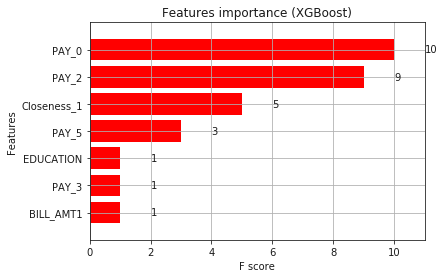

In [55]:
#Plotting variable importance:
fig, (ax) = plt.subplots(ncols=1)
xgb.plot_importance(model, height=0.8, title="Features importance (XGBoost)", ax=ax, color="red") 
plt.show()


 - Out of the 2 models that we used to predict credit card fault XG - Boost predicted the defaulters with more accuracy
 - We tried figuring out more important parameters with the help of these models and Pay, Closeness & Avg Exp came out to be the most prominent fratures
 - For better predictions we could have done hyperparameter tuning in a better way. Ex: altering the dept of tree in Random Forest
 - We could have used techniques like PCA & LDA initially to figure out more important features
 - We could have used better estimators for judging our model like F1 score
 - We could have scaled our parameters and see if the model returned better results
 - We could have used k-fold cross validation which could have helped fetching better results